In [ ]:
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import sys
sys.path.insert(0, './src')
from training import train_model, train_met_model
from models import MultiVAE, MultiDAE, Multi_our_VAE
from data import Dataset

import random
from args import get_args
from training import train_model

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def set_seeds(rand_seed):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)
    random.seed(rand_seed)
    torch.cuda.manual_seed_all(rand_seed)
args = get_args()

dataset = Dataset(args, data_dir='./data/')

### MultiVAE

In [3]:
set_seeds(322)

args.model = 'MultiVAE'
layers = [200, 600, dataset.n_items]
args.l2_coeff = 0.

model = MultiVAE(layers, args=args).to(args.device)

metric_validation = train_model(model, dataset, args)

Sequential(
  (0): Linear(in_features=20108, out_features=600, bias=True)
  (1): Tanh()
  (2): Linear(in_features=600, out_features=400, bias=True)
)
Sequential(
  (0): Linear(in_features=200, out_features=600, bias=True)
  (1): Tanh()
  (2): Linear(in_features=600, out_features=20108, bias=True)
)


  0%|          | 0/200 [00:00<?, ?it/s]

756.31964
491.20193
583.9636


  0%|          | 1/200 [00:11<37:47, 11.39s/it]

Best NDCG: 0.2832444113922384
Current NDCG: 0.2832444113922384


  2%|▏         | 3/200 [00:32<35:54, 10.94s/it]

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(metric_validation)
plt.ylabel("Validation NDCG@100")
plt.xlabel("Epochs")
pass

### MultiDAE

In [4]:
set_seeds(322)

args.model = 'MultiDAE'
layers = [200, dataset.n_items]
args.l2_coeff = 0.01 / args.train_batch_size

model = MultiDAE(layers, args=args).to(args.device)

metric_validation = train_model(model, dataset, args)

  0%|          | 0/200 [00:00<?, ?it/s]

Sequential(
  (0): Linear(in_features=20108, out_features=200, bias=True)
  (1): Tanh()
  (2): Linear(in_features=200, out_features=20108, bias=True)
)
755.6073


  0%|          | 0/200 [00:01<?, ?it/s]


KeyboardInterrupt: 

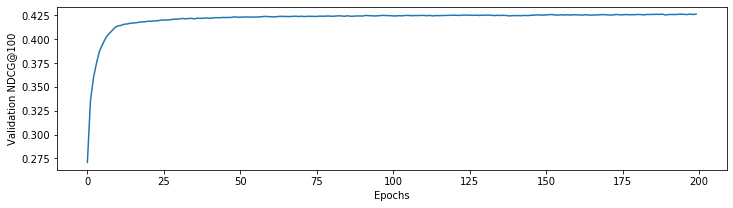

In [6]:
plt.figure(figsize=(12, 3))
plt.plot(metric_validation)
plt.ylabel("Validation NDCG@100")
plt.xlabel("Epochs")
pass

### Our MultiVAE

In [3]:
set_seeds(322)

args.model = 'Multi_our_VAE'
layers = [200, 600, dataset.n_items]
args.l2_coeff = 0.
args.z_dim = layers[0]

model = Multi_our_VAE(layers, args=args).to(args.device)

metric_validation = train_met_model(model, dataset, args)

Sequential(
  (0): Linear(in_features=20108, out_features=600, bias=True)
  (1): Tanh()
  (2): Linear(in_features=600, out_features=400, bias=True)
)
Sequential(
  (0): Linear(in_features=200, out_features=600, bias=True)
  (1): Tanh()
  (2): Linear(in_features=600, out_features=20108, bias=True)
)


  0%|          | 0/200 [00:00<?, ?it/s]

-752.7647
-479.91547
-554.16504


  0%|          | 1/200 [00:25<1:22:56, 25.01s/it]

Best NDCG: 0.27359632269594747
Current NDCG: 0.27359632269594747


  5%|▌         | 10/200 [04:08<1:18:55, 24.92s/it]

-314.12622
-224.13826
-320.08273


  6%|▌         | 11/200 [04:33<1:18:41, 24.98s/it]

Best NDCG: 0.3744394856322495
Current NDCG: 0.3744394856322495


 10%|█         | 20/200 [08:17<1:14:53, 24.96s/it]

-266.17563
-179.49477
-276.59818


 10%|█         | 21/200 [08:42<1:14:18, 24.91s/it]

Best NDCG: 0.38445387368781586
Current NDCG: 0.38439286206500517


 15%|█▌        | 30/200 [12:27<1:10:41, 24.95s/it]

-250.69955
-165.77963
-261.2027


 16%|█▌        | 31/200 [12:52<1:10:25, 25.00s/it]

Best NDCG: 0.3882636676689956
Current NDCG: 0.3882636676689956


 16%|█▌        | 32/200 [13:17<1:10:13, 25.08s/it]

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(metric_validation)
plt.ylabel("Validation NDCG@100")
plt.xlabel("Epochs")
pass